In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

Дана статистика пользователей adult.csv.
Получите значения AUC для различных моделей и их параметров.
Используйте как минимум 3 различные модели классификации.
Решением будет ссылка на гитхаб с ноутбуком.

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
columns = data.columns

In [6]:
data['workclass'].value_counts()['?']

2799

In [7]:
rows_to_drop = []
for i in range(len(data)):
    if '?' in str(data.loc[i]):
        rows_to_drop.append(i)

In [8]:
# удаляем все строчки которые содержат ?, 
data.drop(data.index[rows_to_drop], inplace=True)

In [9]:
# переводим категориальные признаки в числа
cat_features =['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'gender', 'native-country']
data = pd.get_dummies(data, columns = cat_features)

In [10]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [11]:
# зваменим значения целевой переменной на 1 и 0
Y = data['income'].map( {'>50K' : 1, '<=50K' : 0} )
X = data.drop(['income','fnlwgt'], axis=1)

In [12]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

LogisticRegression - AUC
=====

In [104]:
penaltys = ['l2', 'none']
C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
params = []
curves = []
auc = []

In [105]:
for penalty in penaltys:
    for c in C:
        log_reg = LogisticRegression(C = c, 
                                     penalty = penalty, 
                                     random_state = 12).fit(X_train, y_train)
        y_probas = log_reg.predict_proba(X_test)[:, 1]
        
        params.append((penalty, c))
        curves.append(roc_curve(y_test, y_probas))
        auc.append(roc_auc_score(y_test, y_probas))

l2 & 0.001: 0.8650911509125168
l2 & 0.01: 0.8726474428084701
l2 & 0.1: 0.8665391729413138
l2 & 1.0: 0.8750193961081115
l2 & 10.0: 0.8748363313934826
l2 & 100.0: 0.8487363813411599
none & 0.001: 0.8749397389190287
none & 0.01: 0.8749397389190287
none & 0.1: 0.8749397389190287
none & 1.0: 0.8749397389190287
none & 10.0: 0.8749397389190287
none & 100.0: 0.8749397389190287
____________________

BEST SCORE is  0.8750193961081115  - PARAMS [penaltys, c] =  ['l2', 1.0]
____________________


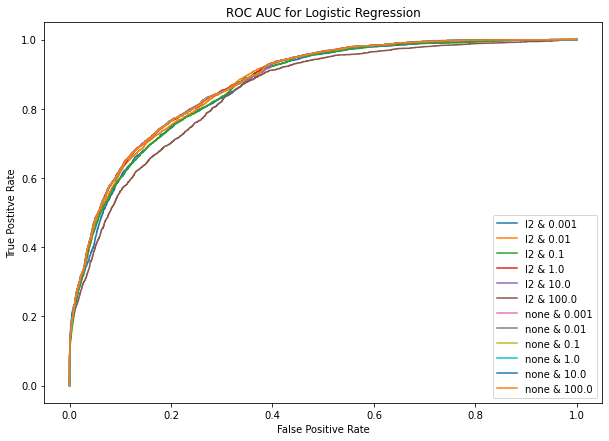

In [106]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{} & {}'.format(params[i][0], params[i][1]))
    
best_score = 0 
best_params = []
for i in range(len(params)):
    print('{} & {}: {}'.format(params[i][0], params[i][1], auc[i]))  
    if auc[i] > best_score:
        best_params = []
        best_score = auc[i] 
        best_params.append(params[i][0])
        best_params.append(params[i][1])
print('_'*20)        
print('\nBEST SCORE is ', best_score, ' - PARAMS [penaltys, c] = ', best_params)
print('_'*20)   
        

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for Logistic Regression')
plt.show()

DecisionTreeClassifier - AUC
=====

In [107]:
depths = [5, 10, 15, 20]
leafs = [2, 4, 8]
features = [10, 50, 100]
params = []
curves = []
auc = []

In [108]:
for depth in depths:
    for leaf in leafs:
        for feature in features:
            tree = DecisionTreeClassifier(max_depth = depth, 
                                          min_samples_leaf = leaf,
                                          max_features = feature, 
                                          random_state = 30).fit(X_train, y_train)
            y_probas = tree.predict_proba(X_test)[:, 1]

            params.append((depth, leaf, feature))
            curves.append(roc_curve(y_test, y_probas))
            auc.append(roc_auc_score(y_test, y_probas))

5 & 2 & 10: 0.7546645516872095
5 & 2 & 50: 0.8690938023137147
5 & 2 & 100: 0.8755062204290318
5 & 4 & 10: 0.7685690926075999
5 & 4 & 50: 0.8715831974286303
5 & 4 & 100: 0.8757130786625538
5 & 8 & 10: 0.7600914315983113
5 & 8 & 50: 0.8713949796106961
5 & 8 & 100: 0.8757357926206986
10 & 2 & 10: 0.8631722820618747
10 & 2 & 50: 0.8972830478734813
10 & 2 & 100: 0.8936066541245699
10 & 4 & 10: 0.8533997383144746
10 & 4 & 50: 0.895676244049821
10 & 4 & 100: 0.8938576879839131
10 & 8 & 10: 0.8392803072285947
10 & 8 & 50: 0.8988112596746636
10 & 8 & 100: 0.8957752613616572
15 & 2 & 10: 0.8702530634335502
15 & 2 & 50: 0.8655734122900075
15 & 2 & 100: 0.8684918824228799
15 & 4 & 10: 0.8727418108120168
15 & 4 & 50: 0.880006894794646
15 & 4 & 100: 0.872076153654601
15 & 8 & 10: 0.8746996446086016
15 & 8 & 50: 0.8877691812755226
15 & 8 & 100: 0.8810792872595997
20 & 2 & 10: 0.8642289705164764
20 & 2 & 50: 0.8536442228386114
20 & 2 & 100: 0.8498790316196145
20 & 4 & 10: 0.8746916414649207
20 & 4 & 5

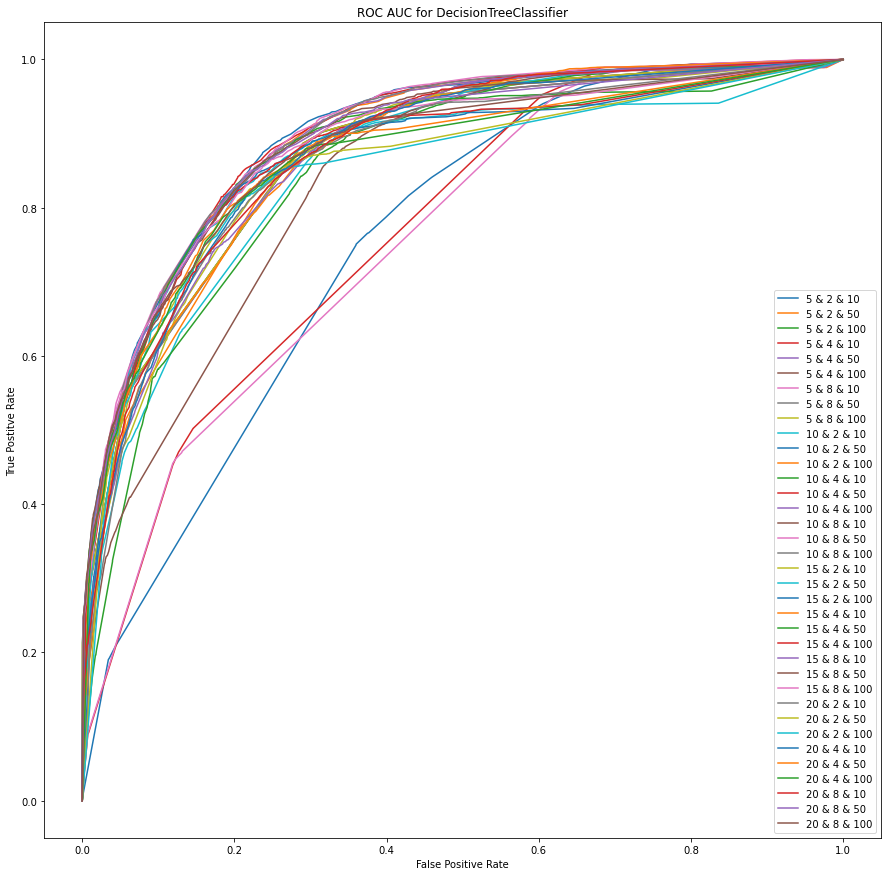

In [109]:
plt.figure(figsize=(15, 15))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{} & {} & {}'.format(params[i][0], params[i][1], params[i][2]))
    
best_score = 0 
best_params = []
for i in range(len(params)):
    print('{} & {} & {}: {}'.format(params[i][0], params[i][1], params[i][2], auc[i]))  
    if auc[i] > best_score:
        best_params = []
        best_score = auc[i] 
        best_params.append(params[i][0])
        best_params.append(params[i][1])
        best_params.append(params[i][2])
print('_'*20)        
print('\nBEST SCORE is ', best_score, ' - PARAMS [depth, leafs, features] = ', best_params)
print('_'*20)      
        

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for DecisionTreeClassifier')
plt.show()

RandomForestClassifier - AUC
=====

In [110]:
depths = [1, 3, 5, 7, 10]
criterions = ['gini', 'entropy']
params = []
curves = []
auc = []

In [111]:
for depth in depths:
    for criterions in criterion:
        rfc = RandomForestClassifier(n_estimators=10, 
                                     criterion = criterions, 
                                     max_depth = depth, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_features='auto', 
                                     max_leaf_nodes=None, 
                                     bootstrap=True, 
                                     oob_score=False, 
                                     n_jobs=-1, 
                                     random_state=None, 
                                     verbose=0, 
                                     warm_start=False, 
                                     class_weight=None).fit(X_train, y_train)
        y_probas = rfc.predict_proba(X_test)[:, 1]
        
        params.append((depth, criterions))
        curves.append(roc_curve(y_test, y_probas))
        auc.append(roc_auc_score(y_test, y_probas))

1 & gini: 0.8264892684464545
1 & entropy: 0.8494580317160555
3 & gini: 0.8560502614696133
3 & entropy: 0.8620947364936155
5 & gini: 0.8857674165535526
5 & entropy: 0.8813059086518877
7 & gini: 0.891092760177739
7 & entropy: 0.8911521072306101
10 & gini: 0.8991450742521884
10 & entropy: 0.8991105714906718
____________________

BEST SCORE is  0.8991450742521884  - PARAMS [depth, criterions] =  [10, 'gini']
____________________


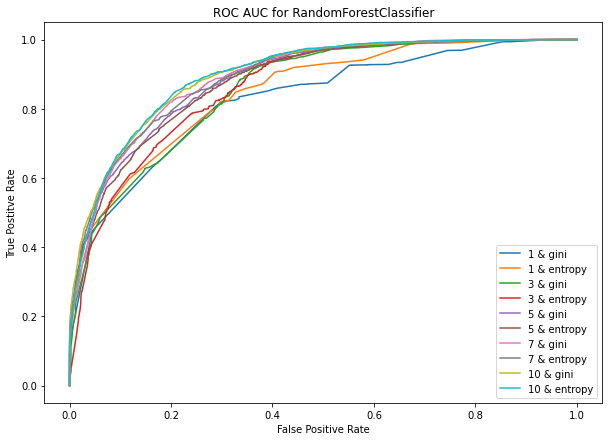

In [112]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{} & {}'.format(params[i][0], params[i][1]))
    
best_score = 0 
for i in range(len(params)):
    print('{} & {}: {}'.format(params[i][0], params[i][1], auc[i]))  
    if auc[i] > best_score:
        best_params = []
        best_score = auc[i] 
        best_params.append(params[i][0])
        best_params.append(params[i][1])
print('_'*20)        
print('\nBEST SCORE is ', best_score, ' - PARAMS [depth, criterions] = ', best_params)
print('_'*20)          

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for RandomForestClassifier')
plt.show()